In [1]:
# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings
import streamlit as st
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras
from sklearn.cluster import KMeans
# folium
import folium
import folium.plugins as plugins
from streamlit_folium import folium_static

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'


# Style
sns.set_style(style = 'darkgrid')

In [8]:
# # merging two csv files
# df = pd.concat(
#     map(pd.read_csv, ['reviews.csv', 'test.csv']), ignore_index=True)

# df.drop_duplicates(keep=False)
# df.to_csv('reviews.csv')

df = pd.read_csv('reviews.csv')
# df.drop(columns = ['Unnamed: 0'], inplace = True)


In [9]:
df.head()

,Unnamed: 0,Summary,Date,JobTitle,AuthorLocation,OverallRating,Pros,Cons
0,0,Amazing!,"Aug 12, 2021",Senior Sales Recruiter,"Aug 12, 2021 - Senior Sales Recruiter",5.0,"-Unparalleled team, benefits, and overall comp...","-Hyper growth always means a big work load, bu..."
1,1,Amazing Company,"Aug 6, 2022","LMTS, Software Engineering","Aug 6, 2022 - LMTS, Software Engineering",5.0,Work life balance\r\nRespect\r\nSalesforce car...,May not offer salary like FAANG companies.
2,2,What a disappointment...,"Nov 30, 2020",Account Executive- Core Team,"in San Francisco, CA",3.0,- Benefits are top notch\r\n- Perks in the tow...,"I came into Salesforce like every rep, excited..."
3,3,Great Company,"Aug 4, 2022",Operations Analyst,"Nov 30, 2020 - Account Executive- Core Team",5.0,Company is really great and the working cultur...,There are times promotions are political
4,4,Great Company Good Culture,"Aug 5, 2022",Lead Engineer/Technologist,"in San Francisco, CA",5.0,PTO\nSalary\nCulture\nCEO & Character,Project teams can be very silo'd which makes i...


In [4]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Summary', 'Date', 'JobTitle',
       'AuthorLocation', 'OverallRating', 'Pros', 'Cons'],
      dtype='object')

In [10]:
df.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [11]:
# df.to_csv('reviews.csv')

In [12]:
df.shape

(16920, 7)

In [13]:
df.head()

,Summary,Date,JobTitle,AuthorLocation,OverallRating,Pros,Cons
0,Amazing!,"Aug 12, 2021",Senior Sales Recruiter,"Aug 12, 2021 - Senior Sales Recruiter",5.0,"-Unparalleled team, benefits, and overall comp...","-Hyper growth always means a big work load, bu..."
1,Amazing Company,"Aug 6, 2022","LMTS, Software Engineering","Aug 6, 2022 - LMTS, Software Engineering",5.0,Work life balance\r\nRespect\r\nSalesforce car...,May not offer salary like FAANG companies.
2,What a disappointment...,"Nov 30, 2020",Account Executive- Core Team,"in San Francisco, CA",3.0,- Benefits are top notch\r\n- Perks in the tow...,"I came into Salesforce like every rep, excited..."
3,Great Company,"Aug 4, 2022",Operations Analyst,"Nov 30, 2020 - Account Executive- Core Team",5.0,Company is really great and the working cultur...,There are times promotions are political
4,Great Company Good Culture,"Aug 5, 2022",Lead Engineer/Technologist,"in San Francisco, CA",5.0,PTO\nSalary\nCulture\nCEO & Character,Project teams can be very silo'd which makes i...


<AxesSubplot:>

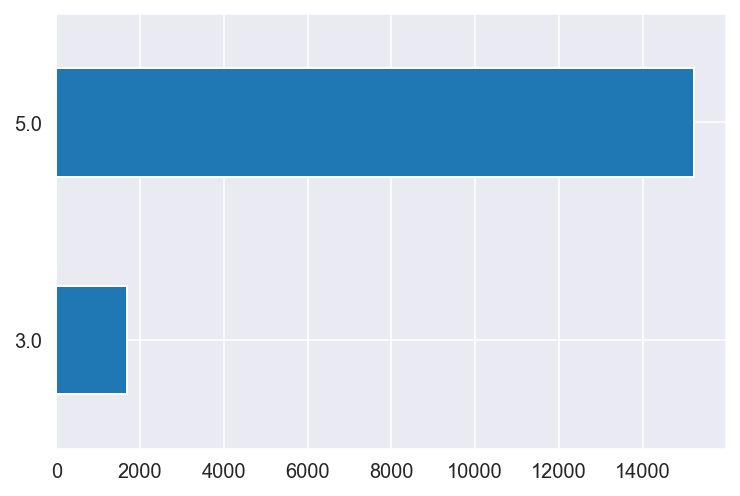

In [14]:
df['OverallRating'].unique()
df['OverallRating'].value_counts().sort_values().plot(kind = 'barh')

We assume reviews less than 3 to be negative and 5 to be positive

In [15]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

[' Senior Sales Recruiter' ' LMTS, Software Engineering'
 ' Account Executive- Core Team' ' Operations Analyst'
 ' Lead Engineer/Technologist' ' Account Executive' ' Sales Associate'
 ' Anonymous Employee' ' Senior Principal Success Manager'
 ' Regional Sales Manager' ' Customer Success Manager' ' Account Director'
 ' Financial Analyst' ' Technical Architect']


<AxesSubplot:>

2022-08-08 02:05:54.871 WARNING matplotlib.font_manager: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


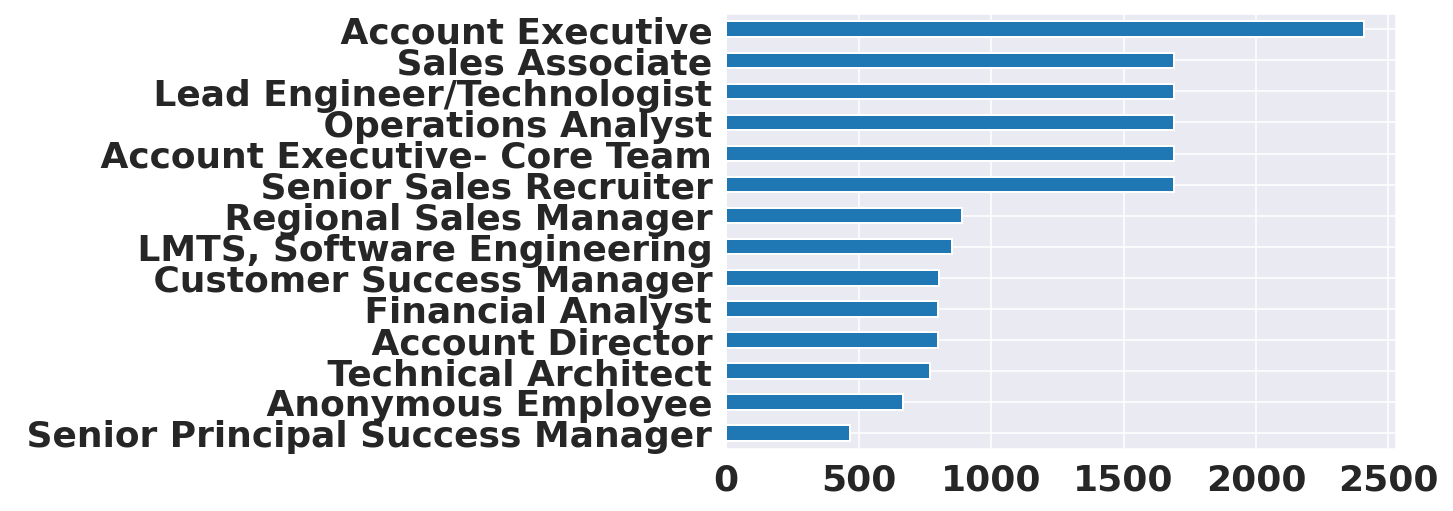

In [16]:
print(df['JobTitle'].unique())
df['JobTitle'].value_counts().sort_values().plot(kind = 'barh')